## Objetivo

- Aprender a implementar o modelo $f_{w,b} (x)$ para regressão linear com uma variável

# Representação do modelo

## Ferramentas

Nesse código, você usará:
- NumPy, uma biblioteca popular para cálculos matriciais, etc
- Matplotlib, uma biblioteca popular para gerar figuras com dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definição do Problema

Nesse código, você usará um exemplo de motivação baseado na previsão de tensão sobre um resistor.

Usaremos para isso um conjunto de dados com apenas 2 amostras - um valor de corrente de 0.2 A que resultou numa tensão de 21 V e um valor de 4.5 A que resultou numa tensão de 430 V. Essas duas amostras de dados contituem nosso *conjunto de dados de treinamento*.

| Corrente (A)     | Tensão (V) |
| -------------------| ------------------------ |
| 0.2               | 21                      |
| 4.5               | 430                      |

Queremos ajustar um modelo de regressão linear a partir desses dois pontos, para que seja possível então estimar a tensão sobre o resistor para outros valores de corrente.


Rodar a célula de código abaixo para criar as variáveis `x_train` e `y_train`. Os dados são armazenados em NumPy arrays de uma dimensão.

In [2]:
# x_train é a variável de entrada (corrente em Àmperes)
# y_train é a variável alvo (tensão em Volts)
x_train = np.array([0.2, 4.5])
y_train = np.array([21.0, 430.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [0.2 4.5]
y_train = [ 21. 430.]


### Número de amostras de treinamento `m`

Usaremos `m` para denotar o número de amostras de treinamento. Numpy arrays têm o parâmetro `.shape`. Nesse contexto, `x_train.shape` retorna uma tupla com uma entrada para cada dimensão. `x_train.shape[0]` é o comprimento da array (primeiro elemento presente na tupla), conforme mostrado abaixo.

In [3]:
# m é o número de amostras de treinamento
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"O número de amostras de treinamento é: {m}")

x_train.shape: (2,)
O número de amostras de treinamento é: 2


É possível também utilizar o função em Python `len()`, conforme abaixo.

In [4]:
m = len(x_train)
print(f"O número de amostras de treinamento é: {m}")

O número de amostras de treinamento é: 2


### Amostra de treinamento `x_i, y_i`

Usaremos (x$^{(i)}$, y$^{(i)}$) para denotar a $i-$ésima amostra de treinamento. Uma vez que a Linguagem Python tem 0 como índice inicial, (x$^{(0)}$, y$^{(0)}$) é (0.2, 21.0) e (x$^{(1)}$, y$^{(1)}$) é (4.5, 430.0).

A i-ésima posição da Numpy array `x_train` é acessada utilizando o comando `x_train[i]`, onde `i` denota a posição desejada.


Veja o código abaixo.

In [5]:
i = 0 # Mude esse valor para 1 para ver (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")
i = 1
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (0.2, 21.0)
(x^(1), y^(1)) = (4.5, 430.0)


### Plotando os dados (gerando uma figura que mostra os dados)

Você pode plotar os dois pontos usando a função `scatter()` presente na biblioteca `matplotlib`, conforme mostrado abaixo.
- Os argumentos `marker` e `c` mostram os pontos como 'x' vermelhos (o padrão são pontos azuis).

Você pode usar outras funções da biblioteca `matplotlib` para definir o título e os rótulos dos eixos

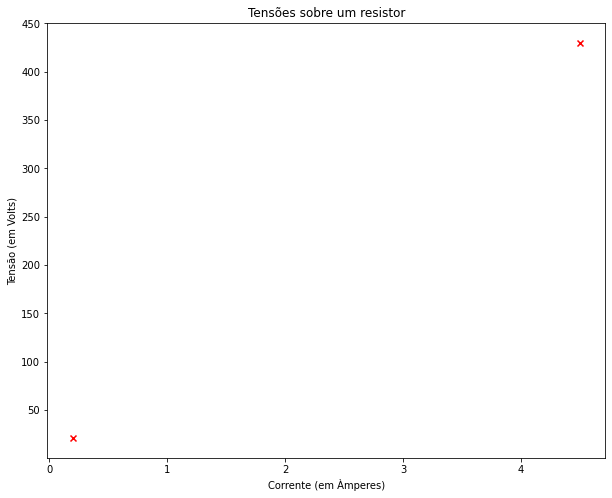

In [6]:
plt.figure(figsize=(10, 8))
# Plotando os pontos dos dados
plt.scatter(x_train, y_train, marker='x', c='r')
# Ajustando o título:
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.show()

## Implementando um modelo

O modelo de função para regressão linear (que é a função que faz o mapeamento de `x` para `y`) é representado por

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

A fórmula acima nos mostra a equação da reta: diferentes valores para $w$ e $b$ levam a diferentes retas. <br/> <br/> <br/> <br/> <br/>


Vamos tentar ganhar mais intuição usando o código abaixo. Vamos começar com $w = 0$ e $b = 100$.

**OBS: Você pode retornar à célula abaixo para ajustar diferentes valores para os parâmetros w e b do modelo**

In [7]:
w = 0
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 0
b: 100


Agora, vamos computar o valor $f_{w,b}(x^{(i)})$ para os dois dados que temos. Você pode explicitamente escrever:

para $x^{(0)}$, `f_wb = w * x[0] + b`

para $x^{(1)}$, `f_wb = w * x[1] + b`

Para uma grande quantidade de dados, isso pode ser demasiadamente repetitivo. Ao invés disso, você pode usar um loop do tipo `for` conforme mostrado na função `calcula_saida_do_modelo` abaixo.
> **OBS**: O argumento `(ndarray (m,))` descreve uma Numpy array de n dimensões da forma (m,). `(scalar)` descreve um argumento sem dimensões, apenas uma magnitude.  
> **OBS**: `np.zero(n)` retorna uma numpy array de 1 dimensão com $n$ valores   


In [8]:
def calcula_saida_do_modelo(x, w, b):
    """
    Calcula a previsão para um modelo na forma de reta
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras
      w,b (escalar)   : Parâmetros do modelo
    Retorna
      y (ndarray (m,)): Previsão de saída
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m): # estrutura 'for' em Python
        f_wb[i] = w * x[i] + b

    return f_wb

Agora vamos chamar a função `calcula_saida_do_modelo` e plotar o resultado

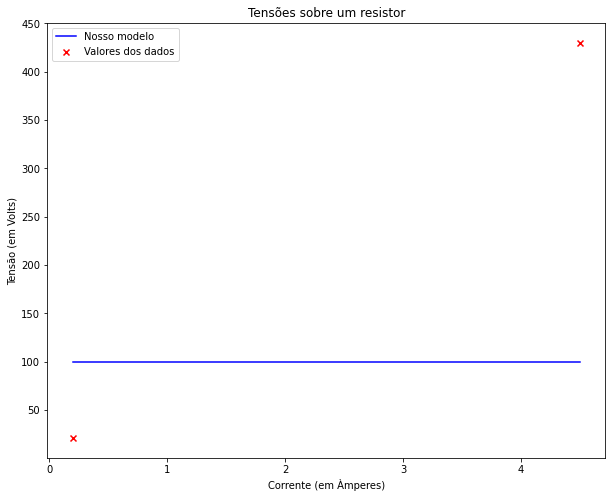

In [9]:
f_wb_calculado = calcula_saida_do_modelo(x_train, w, b)

plt.figure(figsize=(10, 8))
# Plotando a previsão feita pelo modelo
plt.plot(x_train, f_wb_calculado, c='b',label='Nosso modelo')

# Plotando os dados medidos
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores dos dados')

# Definindo o título
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()


# Questão proposta: Simulação de como se comportaria um resistor de 50 $\Omega$ - considerando que $b$ esteja presente e numericamente igual ao exemplo anterior

In [10]:
# obtendo o valor de b utilizado no exercício anterior - vou apenas mudar o w para 50 
w = (y_train[1]  - y_train[0]) / (x_train[1] - x_train[0])
b = y_train[0] - w * x_train[0]
x_train = np.array([1, 2, 3, 4])
y_train = 50 * x_train + b # valor de w alterado, b continua o mesmo

## Levantamento dos parâmetros: Método dos mínimos quadrados

In [11]:
# método dos mínimos quadrados do jeito mambembe
def mmq(x, y):
    # garantindo que x e y sejam arrays numpy
    x = np.array(x)
    y = np.array(y)
    # regressão linear simples
    n = len(x)
    sumX = np.sum(x)
    sumX2 = np.sum(x ** 2)
    sumY = np.sum(y)
    sumXY = np.sum(x * y)
    sumXsumY = sumX * sumY
    w = (n * sumXY - sumXsumY) / (n * sumX2 - sumX ** 2)
    b = (sumY - w * sumX) / n
    return w, b


## Obtendo os parâmetros do modelo

In [12]:
w, b = mmq(x_train, y_train)
print(f"w: {w:.04f}")
print(f"b: {b:.04f}")

w: 50.0000
b: 1.9767


## Teste: Computando os valores da reta resultante com os valores de $w$ e $b$

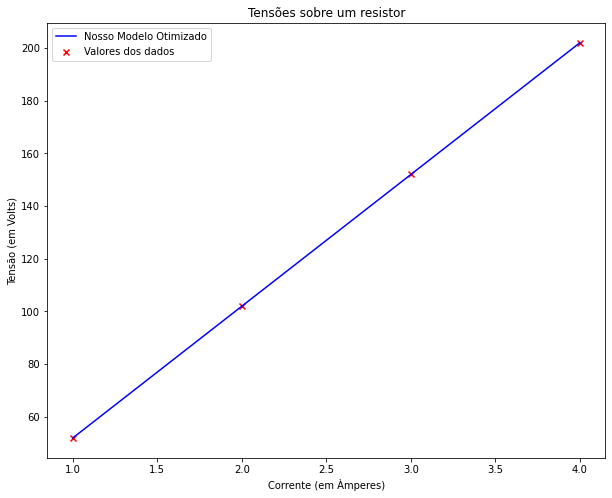

In [13]:
f_wb_calculado = calcula_saida_do_modelo(x_train, w, b,)

plt.figure(figsize=(10, 8))
# Plotando a previsão feita pelo modelo
plt.plot(x_train, f_wb_calculado, c='b',label='Nosso Modelo Otimizado')

# Plotando os dados medidos
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores dos dados')

# Definindo o título
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()

## Previsão fora da faixa

In [14]:
x_i = 7
tensao_para_7_amperes = w * x_i + b

print(f"{tensao_para_7_amperes:.02f} Volts")

351.98 Volts


## Desafio: O método dos mínimos quadrados funciona com ruído aditivo gaussiano ou branco?

In [15]:
# gerando uma quantidade suficiente de pontos
n_points = 1000
x_min = 0
x_max = 10
sigma = 10
mu = 0.0
x_train = np.linspace(x_min, x_max, n_points)
delta = np.sqrt(12 * sigma ** 2) / 2
# adicionando ruído

# instanciando um gerador aleatório - agradeço à numpy por isto
rng = np.random.default_rng(12345)

# gerando as sequências
y_wn = w * x_train + b + rng.uniform(-delta, delta, n_points)
y_awgn = w * x_train + b + rng.normal(mu, sigma, n_points)


## Obtendo os parâmetros do modelo - ruido branco e ruído gaussiano 

In [16]:
w_wn, b_wn = mmq(x_train, y_wn)
print(f"w_wn: {w_wn:.04f}")
print(f"b_wn: {b_wn:.04f}")
w_awgn, b_awgn = mmq(x_train, y_awgn)
print(f"w_awgn: {w_awgn:.04f}")
print(f"b_awgn: {b_awgn:.04f}")

w_wn: 50.1050
b_wn: 1.1663
w_awgn: 49.7197
b_awgn: 3.7059


## Verificando o quão boa foi a regressão através do método dos mínimos quadrados

In [17]:
# função de cálculo do parâmetro de determinação (R ** 2)

def calcular_r2(Y, Y_pred):
    # Soma Total dos Quadrados (SST)
    SST = np.sum((Y - np.mean(Y))**2)
    
    # Soma dos Quadrados dos Resíduos (SSR)
    SSR = np.sum((Y - Y_pred)**2)
    
    # Coeficiente de Determinação (R^2)
    r2 = 1 - (SSR / SST)
    
    return r2

# obtendo os dados preditos
y_wn_pred = w_wn * x_train + b_wn
y_awgn_pred = w_awgn * x_train + b_awgn
r2_wn = calcular_r2(y_wn, y_wn_pred)
r2_awgn = calcular_r2(y_awgn, y_awgn_pred)
print(f"r2_wn: {r2_wn:.04f}")
print(f"r2_awgn: {r2_awgn:.04f}")

r2_wn: 0.9954
r2_awgn: 0.9951


Embora não seja perfeito, o MMQ conseguiu performar bem: capturou cerca de 99.5% do comportamento esperado em ambos os casos

## Teste: Computando os valores da reta resultante com os valores de $w$ e $b$

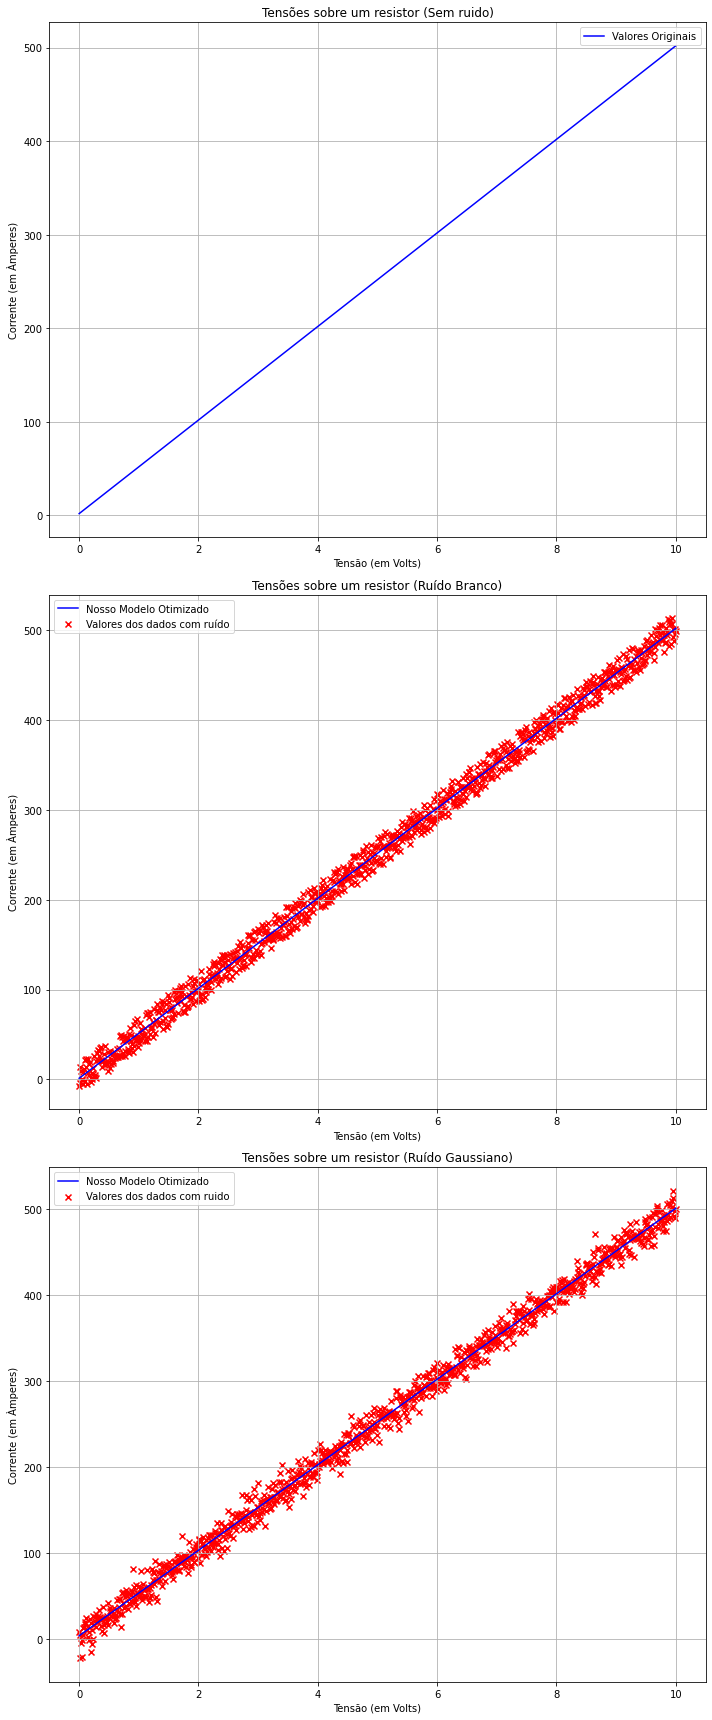

In [18]:
f_wb_calculado = calcula_saida_do_modelo(x_train, w, b,)

# Criar uma figura e uma grade de subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 24))  # 3 linhas, 1 coluna

# Plotando a previsão feita pelo modelo
axs[0].plot(x_train, f_wb_calculado, c='b',label='Valores Originais')

axs[0].set_title("Tensões sobre um resistor (Sem ruido)")
axs[0].set_xlabel('Tensão (em Volts)')
axs[0].set_ylabel('Corrente (em Àmperes)')
axs[0].legend()
axs[0].grid(True)

# Segundo gráfico
# Plotando a previsão feita pelo modelo
axs[1].plot(x_train, y_wn_pred, c='b',label='Nosso Modelo Otimizado')

# Plotando os dados medidos
axs[1].scatter(x_train, y_wn, marker='x', c='r',label='Valores dos dados com ruído')

axs[1].set_title("Tensões sobre um resistor (Ruído Branco)")
axs[1].set_xlabel('Tensão (em Volts)')
axs[1].set_ylabel('Corrente (em Àmperes)')
axs[1].legend()
axs[1].grid(True)

# Terceiro gráfico
# Plotando a previsão feita pelo modelo
axs[2].plot(x_train, y_awgn_pred, c='b',label='Nosso Modelo Otimizado')

# Plotando os dados medidos
axs[2].scatter(x_train, y_awgn, marker='x', c='r',label='Valores dos dados com ruido')

axs[2].set_title("Tensões sobre um resistor (Ruído Gaussiano)")
axs[2].set_xlabel('Tensão (em Volts)')
axs[2].set_ylabel('Corrente (em Àmperes)')
axs[2].legend()
axs[2].grid(True)

# Ajustar layout
plt.tight_layout()

# Mostrar a figura
plt.show()